In [1]:
import cartopy.crs as ccrs
import iris
import xarray
import matplotlib.pyplot as plt
from cartopy.io.img_tiles import OSM

In [2]:
cube_mslp = iris.load_cube('~/cylc-run/u-cy369/share/cycle/*/aus2200/d0198/RA3/um/umnsa_spec_*', 'air_pressure_at_sea_level')
mslp = xarray.DataArray.from_iris(cube_mslp)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/iris/fileformats/rules.py:353: UserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(msg.format(factory=factory_name))


In [3]:
cube_rain = iris.load_cube('~/cylc-run/u-cy369/share/cycle/*/aus2200/d0198/RA3/um/umnsa_spec_*', 'stratiform_rainfall_amount')
rain = xarray.DataArray.from_iris(cube_rain)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/iris/fileformats/rules.py:353: UserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(msg.format(factory=factory_name))


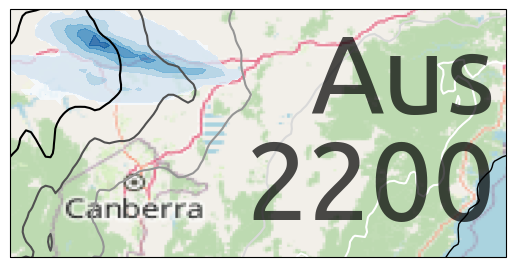

In [40]:
ax = plt.axes(projection=ccrs.PlateCarree())

c = [149.1, -35.1]
d = 0.5
ax.set_extent([c[0]-d,c[0]+d+2*d,c[1]-d,c[1]+d])

ax.add_image(OSM(), 7)

data = mslp.sel(time='20200120T11').mean('time')
cs = data.plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=[100200,100300,100400,100500,100600], cmap='Greys')

data = rain.sel(time='20200120T11').sum('time')
data.where(data>2).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', alpha=0.8, add_colorbar=False)

ax.coastlines()

plt.text(0.98,0.5,"Aus\n2200",transform=ax.transAxes,fontsize=80,ha='right',va='center',fontfamily='Ubuntu',alpha=0.7,linespacing=1)

plt.savefig('logo.png');